In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
from folium.plugins import HeatMap

df = pd.read_csv('train.csv')

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.passenger_count = df.passenger_count.astype(np.uint8)
df.vendor_id = df.vendor_id.astype(np.uint8)
for c in [c for c in df.columns if c.endswith('tude')]:
    df.loc[:,c] = df[c].astype(np.float32)

In [5]:
# check for null values
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [6]:
print('Passengers : {} to {}'.format(df.passenger_count.max(),df.passenger_count.min()))

print('Datetime ranges from : {} to {}'.format(df.pickup_datetime.min(),df.pickup_datetime.max()))

Passengers : 9 to 0
Datetime ranges from : 2016-01-01 00:00:17 to 2016-06-30 23:59:39


In [7]:
df['mm_pickup'] = pd.to_datetime(df.pickup_datetime).dt.month.astype(np.uint8)

df['dow_pickup'] = pd.to_datetime(df.pickup_datetime).dt.weekday.astype(np.uint8)

df['hh_pickup'] = pd.to_datetime(df.pickup_datetime).dt.hour.astype(np.uint8)

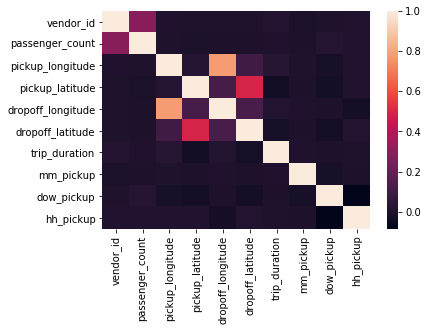

In [8]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

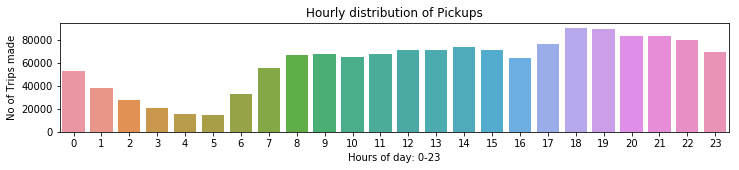

In [9]:
plt.figure(figsize=(12,2))
data = df.groupby('hh_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='id',data=data)
plt.title('Hourly distribution of Pickups')
plt.xlabel('Hours of day: 0-23')
plt.ylabel('No of Trips made')
pass

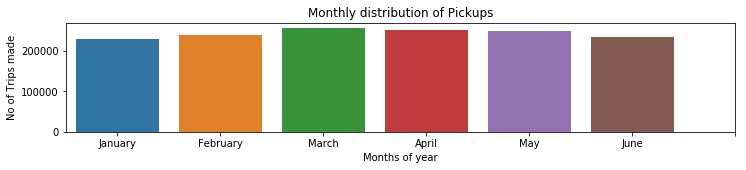

In [10]:
plt.figure(figsize=(12,2))
data = df.groupby('mm_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='mm_pickup',y='id',data=data)
plt.title('Monthly distribution of Pickups')
plt.xlabel('Months of year')

mm_names = ['January','February','March','April','May','June','July']

plt.xticks(range(0,7),mm_names[:6],rotation='horizontal')
plt.ylabel('No of Trips made')
pass

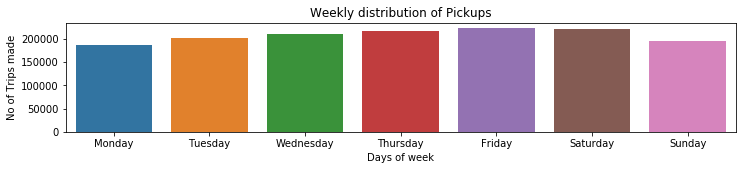

In [11]:
plt.figure(figsize=(12,2))
data = df.groupby('dow_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='dow_pickup',y='id',data=data)
plt.title('Weekly distribution of Pickups')

dow_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.xticks(range(0,7),dow_names,rotation='horizontal')
plt.xlabel('Days of week')
plt.ylabel('No of Trips made')
pass

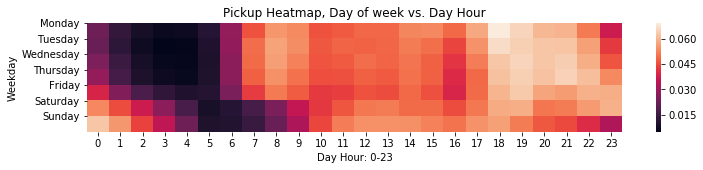

In [12]:
plt.figure(figsize=(12,2))

sns.heatmap(data=pd.crosstab(df.dow_pickup,df.hh_pickup,values=df.vendor_id,aggfunc='count',normalize='index'))
plt.title('Pickup Heatmap, Day of week vs. Day Hour')
plt.ylabel('Weekday')
plt.xlabel('Day Hour: 0-23')
plt.yticks(range(0,7),dow_names[::],rotation='horizontal')
pass

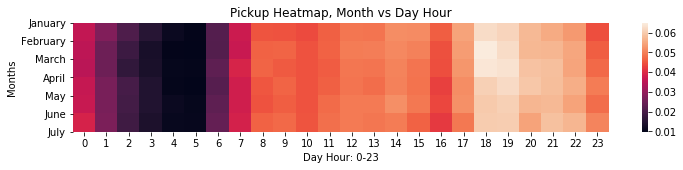

In [13]:
plt.figure(figsize=(12,2))

sns.heatmap(data=pd.crosstab(df.mm_pickup,df.hh_pickup,values=df.vendor_id,aggfunc='count',normalize='index'))
plt.title('Pickup Heatmap, Month vs Day Hour')
plt.ylabel('Months')
plt.xlabel('Day Hour: 0-23')
plt.yticks(range(0,7),mm_names[::],rotation='horizontal')
pass

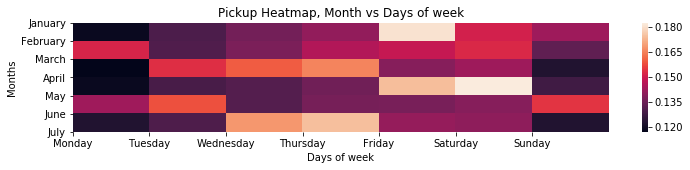

In [14]:
plt.figure(figsize=(12,2))

sns.heatmap(data=pd.crosstab(df.mm_pickup,df.dow_pickup,values=df.vendor_id,aggfunc='count',normalize='index'))
plt.title('Pickup Heatmap, Month vs Days of week')
plt.ylabel('Months')
plt.yticks(range(0,7),mm_names,rotation='horizontal')
plt.xlabel('Days of week')
plt.xticks(range(0,7),dow_names[::], rotation='horizontal')
pass

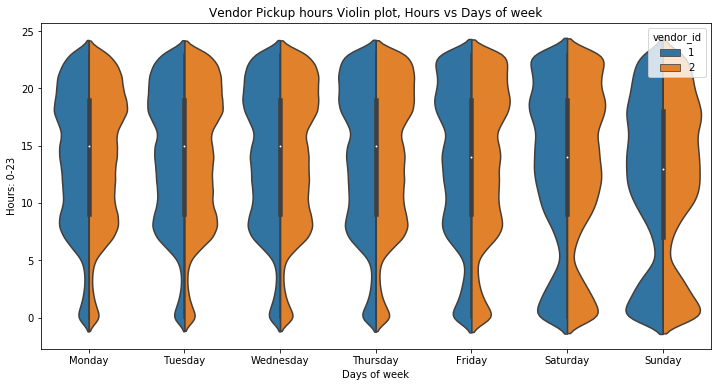

In [15]:
plt.figure(figsize=(12,6))

sns.violinplot(x=df.dow_pickup,y=df.hh_pickup,hue=df.vendor_id,split=True)
plt.title('Vendor Pickup hours Violin plot, Hours vs Days of week')
plt.xlabel('Days of week')
plt.ylabel('Hours: 0-23')
plt.xticks(range(0,7),dow_names,rotation='horizontal')
pass

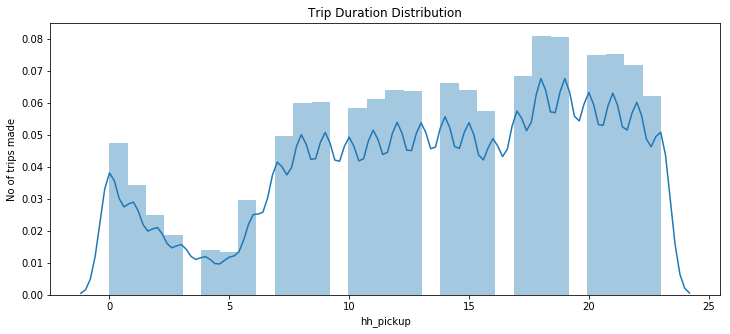

In [16]:
plt.figure(figsize=(12,5))
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration - minutes')
plt.ylabel('No of trips made')
sns.distplot(df.hh_pickup[1:],bins=30)
pass

/home/saeed/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


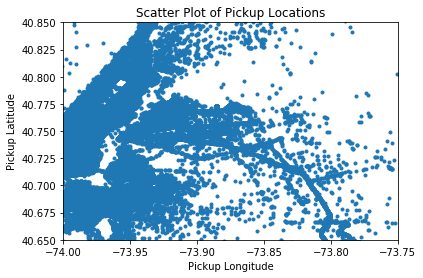

In [17]:

plt.scatter(df['pickup_longitude'],df['pickup_latitude'],marker='.')


ax = plt.axes()
ax.set_xlim([-74,-73.75])
ax.set_ylim([40.650,40.850])
plt.xlabel('Pickup Longitude');
plt.ylabel('Pickup Latitude');
plt.title('Scatter Plot of Pickup Locations');

/home/saeed/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


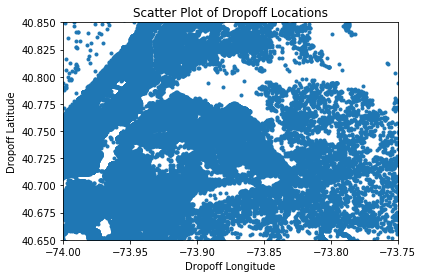

In [18]:
plt.scatter(df['dropoff_longitude'],df['dropoff_latitude'],marker='.')


ax = plt.axes()
ax.set_xlim([-74,-73.75])
ax.set_ylim([40.650,40.850])
plt.xlabel('Dropoff Longitude');
plt.ylabel('Dropoff Latitude');
plt.title('Scatter Plot of Dropoff Locations');

In [19]:
df['pickup_latitude_round3']=df['pickup_latitude'].apply(lambda x:round(x,3))
df['pickup_longitude_round3']=df['pickup_longitude'].apply(lambda x:round(x,3))
df['dropoff_latitude_round3']=df['dropoff_latitude'].apply(lambda x:round(x,3))
df['dropoff_longitude_round3']=df['dropoff_longitude'].apply(lambda x:round(x,3))

In [20]:
pickup=df.groupby(['pickup_latitude_round3','pickup_longitude_round3'])['trip_duration'].mean().reset_index().rename(columns={'trip_duration':'Avg_Trip_duration'})
pickup_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)
hm_wide = HeatMap(list(zip(pickup.pickup_latitude_round3.values, pickup.pickup_longitude_round3.values, pickup.Avg_Trip_duration.values)),
                     min_opacity=0.2,
                     radius=7, blur=15,
                     max_zoom=1)
pickup_map.add_child(hm_wide)
pickup_map

In [21]:
dropoff=df.groupby(['dropoff_latitude_round3','dropoff_longitude_round3'])['trip_duration'].mean().reset_index().rename(columns={'trip_duration':'Avg_Trip_duration'})
dropoff_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)
hm_wide = HeatMap(list(zip(dropoff.dropoff_latitude_round3.values, dropoff.dropoff_longitude_round3.values, dropoff.Avg_Trip_duration.values)),
                     min_opacity=0.2,
                     radius=7, blur=15,
                     max_zoom=1)
dropoff_map.add_child(hm_wide)
dropoff_map

In [22]:
pick=df.groupby(['pickup_latitude_round3','pickup_longitude_round3'])['id'].count().reset_index().rename(columns={'id':'num_trips'})
pick_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)
hm_wide = HeatMap(list(zip(pick.pickup_latitude_round3.values, pick.pickup_longitude_round3.values, pick.num_trips.values)),
                     min_opacity=0.2,
                     radius=7, blur=15,
                     max_zoom=1)
pick_map.add_child(hm_wide)
pick_map

In [23]:
drop=df.groupby(['dropoff_latitude_round3','dropoff_longitude_round3'])['id'].count().reset_index().rename(columns={'id':'num_trips'})
drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 10,)
hm_wide = HeatMap(list(zip(drop.dropoff_latitude_round3.values, drop.dropoff_longitude_round3.values, drop.num_trips.values)),
                     min_opacity=0.2,
                     radius=7, blur=15,
                     max_zoom=1)
drop_map.add_child(hm_wide)
drop_map

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['trip_duration','id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
y = df.trip_duration

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [25]:
from sklearn.metrics import mean_squared_error

avg_trip_duration = round(np.mean(y), 2)
baseline_pred = np.repeat(avg_trip_duration, y_test.shape[0])
print(baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(baseline_pred, y_test))
print(baseline_rmse)

[959.49 959.49 959.49 ... 959.49 959.49 959.49]
3177.4683645690143


In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  3216.1308208100936
Train RMSE for Linear Regression is  5755.154661460905
Variance for Linear Regression is  2539.0238406508115
